# Interpolación de Lagrange

<IPython.core.display.Math object>

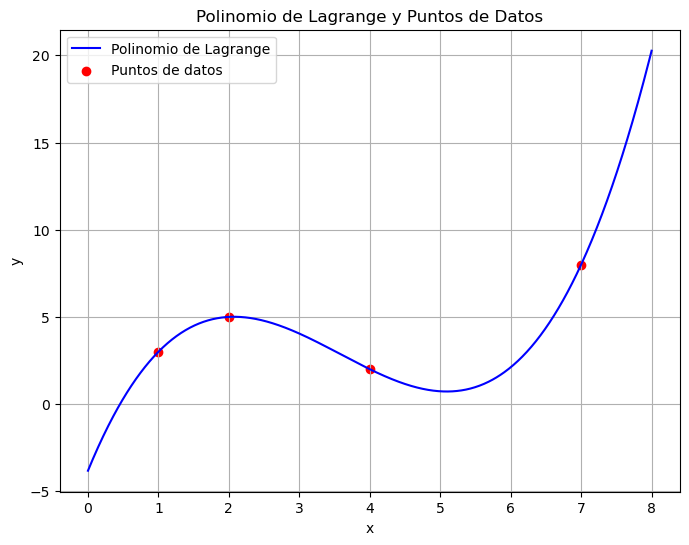

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, Mul
from IPython.display import display, Math

def polinomio_lagrange(datos):
    """
    Encuentra y devuelve la expresión simbólica del polinomio de Lagrange para un conjunto de datos dado.

    Parameters:
    - datos: Lista de tuplas (x, y) representando los puntos conocidos.

    Returns:
    - La expresión simbólica del polinomio de Lagrange.
    """

    x = symbols('x')

    def polinomio_base(k, datos):
        """Calcula el k-ésimo polinomio base de Lagrange."""
        n = len(datos)
        numerador = Mul(*[(x - datos[j][0]) for j in range(n) if j != k])
        denominador = Mul(*[(datos[k][0] - datos[j][0]) for j in range(n) if j != k])
        return simplify(numerador / denominador)

    n = len(datos)
    polinomio_lagrange = sum(datos[i][1] * polinomio_base(i, datos) for i in range(n))
    return polinomio_lagrange

def graficar_polinomio_lagrange(datos):
    """
    Grafica el polinomio de Lagrange y resalta los puntos de datos en color rojo.

    Parameters:
    - datos: Lista de tuplas (x, y) representando los puntos conocidos.
    """

    polinomio_expr = polinomio_lagrange(datos)
    
    valores_x = np.linspace(min(datos, key=lambda x: x[0])[0] - 1, max(datos, key=lambda x: x[0])[0] + 1, 1000)
    valores_polinomio = [polinomio_expr.subs('x', xi) for xi in valores_x]

    plt.figure(figsize=(8, 6))
    plt.plot(valores_x, valores_polinomio, label='Polinomio de Lagrange', color='blue')
    plt.scatter(*zip(*datos), color='red', label='Puntos de datos')
    plt.title('Polinomio de Lagrange y Puntos de Datos')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso:
datos_ejemplo = [(1, 3), (2, 5), (4, 2), (7, 8)]
lagrange_polynomial_latex(datos)
graficar_polinomio_lagrange(datos_ejemplo)

